In [1]:
# importing relevant libraries
import pandas as pd
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

In [2]:
# Load dataset into dataframe
path = r'C:\Users\Juan\Desktop\Data\project1\game.csv'
df = pd.read_csv(path)

In [3]:
df.head(10)

,game,genre,platform,publisher,Success
0,.hack//G.U. Vol.1//Rebirth,Role-Playing,PS2,Namco Bandai Games,Not Successful
1,.hack//G.U. Vol.2//Reminisce,Role-Playing,PS2,Namco Bandai Games,Not Successful
2,.hack//G.U. Vol.2//Reminisce (jp sales),Role-Playing,PS2,Namco Bandai Games,Not Successful
3,.hack//G.U. Vol.3//Redemption,Role-Playing,PS2,Namco Bandai Games,Not Successful
4,.hack//Link,Role-Playing,PSP,Namco Bandai Games,Not Successful
5,.hack: Sekai no Mukou ni + Versus,Action,PS3,Namco Bandai Games,Not Successful
6,007: Quantum of Solace,Action,Wii,Activision,Successful
7,007: Quantum of Solace,Action,DS,Activision,Not Successful
8,007: Quantum of Solace,Action,X360,Activision,Successful
9,007: Quantum of Solace,Action,PS3,Activision,Successful


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11152 entries, 0 to 11151
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   game       11152 non-null  object
 1   genre      11152 non-null  object
 2   platform   11152 non-null  object
 3   publisher  11135 non-null  object
 4   Success    11152 non-null  object
dtypes: object(5)
memory usage: 435.8+ KB


In [5]:
df.describe()

,game,genre,platform,publisher,Success
count,11152,11152,11152,11135,11152
unique,7355,12,16,389,2
top,Need for Speed: Most Wanted,Action,DS,Electronic Arts,Not Successful
freq,10,2524,2109,895,8691


In [6]:
# ~20 null values were detected in the publisher column. Saving them for inspecting
null_v = df[df['publisher'].isnull()]
null_v.head()

,game,genre,platform,publisher,Success
787,Bentley's Hackpack,Misc,GBA,NaN,Successful
991,Bound By Flame,Role-Playing,X360,NaN,Not Successful
1324,Cartoon Network Collection: Game Boy Advance V...,Misc,GBA,NaN,Not Successful
1325,Cartoon Network Collection: Game Boy Advance V...,Misc,GBA,NaN,Not Successful
1774,Dance with Devils,Action,PSV,NaN,Not Successful


In [7]:
# Dropping the null values. Some checks were dont before dropping, they can be seen below.
df = df.dropna(subset=['publisher'])
# Confirming
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11135 entries, 0 to 11151
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   game       11135 non-null  object
 1   genre      11135 non-null  object
 2   platform   11135 non-null  object
 3   publisher  11135 non-null  object
 4   Success    11135 non-null  object
dtypes: object(5)
memory usage: 522.0+ KB


In [8]:
# checking to see if removing the null values will affect the results in any significant way
null_v.groupby('genre').size()

genre
Action          2
Adventure       1
Misc            6
Platform        1
Puzzle          1
Racing          1
Role-Playing    1
Simulation      3
Strategy        1
dtype: int64

In [9]:
# no huge bias in any genre, checking for platform
null_v.groupby('platform').size()

platform
3DS     1
DS      2
GBA     6
PC      5
PSV     2
X360    1
dtype: int64

In [10]:
print(null_v['Success'].value_counts(normalize=True))
null_v['Success'].value_counts()

Not Successful    0.882353
Successful        0.117647
Name: Success, dtype: float64


Not Successful    15
Successful         2
Name: Success, dtype: int64

In [11]:
print(df['Success'].value_counts(normalize=True))
df['Success'].value_counts()

Not Successful    0.779165
Successful        0.220835
Name: Success, dtype: float64


Not Successful    8676
Successful        2459
Name: Success, dtype: int64

In [12]:
# conduction hypothesis testing to see if the difference in proportions is statistically significant

count = [2459, 2]
nobs = [2459 + 8676, 15 + 2]

stat, p_value = proportions_ztest(count, nobs, value=None, alternative='two-sided', prop_var=False)
print('p value = ', p_value)

a = 0.05 # significance level
if p_value <= a:
    print('null hypothesis is rejected, thus the proportions are different')
elif p_value > a:
    print('null hypothesis failed to be rejected, thus the difference in proportions is not statistically significant')

p value =  0.30529502079652426
null hypothesis failed to be rejected, thus the difference in proportions is not statistically significant


In [13]:
# renaming the 'Success' column to get rid of capital S so that it matches with the other columns
df.rename(columns = {'Success':'success'}, inplace = True)
df.head()

,game,genre,platform,publisher,success
0,.hack//G.U. Vol.1//Rebirth,Role-Playing,PS2,Namco Bandai Games,Not Successful
1,.hack//G.U. Vol.2//Reminisce,Role-Playing,PS2,Namco Bandai Games,Not Successful
2,.hack//G.U. Vol.2//Reminisce (jp sales),Role-Playing,PS2,Namco Bandai Games,Not Successful
3,.hack//G.U. Vol.3//Redemption,Role-Playing,PS2,Namco Bandai Games,Not Successful
4,.hack//Link,Role-Playing,PSP,Namco Bandai Games,Not Successful


In [14]:
# encoding categorical data: genre, platform, success. 2 ways were tried for genre. With dummies and with codes.
df['genre_code'] = df['genre'].astype('category').cat.codes # for codes
df_d = pd.get_dummies(data=df, columns=['genre'], dtype='int') # for dummies
df['platform_code'] = df['platform'].astype('category').cat.codes
df_d['platform_code'] = df['platform'].astype('category').cat.codes
df['success_binary'] = df['success'].astype('category').cat.codes
df_d['success_binary'] = df['success'].astype('category').cat.codes

df.head()


,game,genre,platform,publisher,success,genre_code,platform_code,success_binary
0,.hack//G.U. Vol.1//Rebirth,Role-Playing,PS2,Namco Bandai Games,Not Successful,7,6,0
1,.hack//G.U. Vol.2//Reminisce,Role-Playing,PS2,Namco Bandai Games,Not Successful,7,6,0
2,.hack//G.U. Vol.2//Reminisce (jp sales),Role-Playing,PS2,Namco Bandai Games,Not Successful,7,6,0
3,.hack//G.U. Vol.3//Redemption,Role-Playing,PS2,Namco Bandai Games,Not Successful,7,6,0
4,.hack//Link,Role-Playing,PSP,Namco Bandai Games,Not Successful,7,9,0


In [15]:
%%capture
# Instead of encoding publisher for every different name, i will create sub categories based on number of successful games released

# making function that will assign an arbitrary value to each company based on how many successful games they made
def function1(x):
    if x >= 100:
        return 2
    elif x >= 10:
        return 1
    else:
        return 0
    
# group companies by name and then group their successful and not successful games, and save it as a dataframe
comp = df.groupby(['publisher', 'success_binary']).size().unstack(fill_value=0).stack().reset_index(name='count')


# only keep the number of successful games, and then sort by number of succcessful games
comp_succ = comp[comp.success_binary == 1]
comp_succ.sort_values('count', ascending = False)
print(comp_succ[comp_succ['publisher'] == 'Namco Bandai Games']) # this was added later for checking a random publisher and the code's success


# apply the function, now we make a new row that assigns a value to each company
comp_succ['company_value'] = comp_succ['count'].apply(function1)
# resetting index and dropping unneded columns
comp_succ = comp_succ.reset_index(drop=True)
comp_succ = comp_succ.drop('count', axis=1)  # drop unneeded columns
comp_succ = comp_succ.drop('success_binary', axis=1)
comp_succ.head(10)


In [16]:
# encoding categorical data: publisher
comp_dict = comp_succ.set_index('publisher')['company_value'].to_dict()
len(comp_dict)

# replacing values based on the dictionary
df['publisher_rank'] = df['publisher'].replace(comp_dict)
df_d['publisher_rank'] = df['publisher'].replace(comp_dict)
df.head(10)

,game,genre,platform,publisher,success,genre_code,platform_code,success_binary,publisher_rank
0,.hack//G.U. Vol.1//Rebirth,Role-Playing,PS2,Namco Bandai Games,Not Successful,7,6,0,1
1,.hack//G.U. Vol.2//Reminisce,Role-Playing,PS2,Namco Bandai Games,Not Successful,7,6,0,1
2,.hack//G.U. Vol.2//Reminisce (jp sales),Role-Playing,PS2,Namco Bandai Games,Not Successful,7,6,0,1
3,.hack//G.U. Vol.3//Redemption,Role-Playing,PS2,Namco Bandai Games,Not Successful,7,6,0,1
4,.hack//Link,Role-Playing,PSP,Namco Bandai Games,Not Successful,7,9,0,1
5,.hack: Sekai no Mukou ni + Versus,Action,PS3,Namco Bandai Games,Not Successful,0,7,0,1
6,007: Quantum of Solace,Action,Wii,Activision,Successful,0,11,1,2
7,007: Quantum of Solace,Action,DS,Activision,Not Successful,0,2,0,2
8,007: Quantum of Solace,Action,X360,Activision,Successful,0,13,1,2
9,007: Quantum of Solace,Action,PS3,Activision,Successful,0,7,1,2


In [17]:
# importing for the modeling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [18]:
# defining y, X. We want to predict the game's success based on genre, platform and publisher. we only need the number labeled columns

# saving alternative dataframes. For this modeling, we discard the "platform" column, so the next part of the code gets rid of
# duplicates (as up until now each game appeared as many times as it different consoler eleases)
df_alt = df.drop_duplicates('game')
df_d_alt = df_d.drop_duplicates('game')

# the original y, X we use for the model.
y = df['success_binary']
X = df.drop(columns = ['game', 'genre', 'platform', 'publisher', 'success', 'success_binary'])

# 2 other y, X pairs that were tried. _a uses the dummy version of genre instead of the encoding
y_a = df_alt['success_binary']
X_d = df_d.drop(columns = ['game', 'genre_code', 'platform', 'publisher', 'success', 'success_binary'])
# _da uses the dummy version and also discards platform_code
X_da = df_d_alt.drop(columns = ['game', 'genre_code', 'platform', 'publisher', 'success', 'success_binary', 'platform_code'])
X_da.head()

,genre_Action,genre_Adventure,genre_Fighting,genre_Misc,genre_Platform,genre_Puzzle,genre_Racing,genre_Role-Playing,genre_Shooter,genre_Simulation,genre_Sports,genre_Strategy,publisher_rank
0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,0,1
4,0,0,0,0,0,0,0,1,0,0,0,0,1


In [19]:
# splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8351 entries, 10533 to 1939
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   genre_code      8351 non-null   int8 
 1   platform_code   8351 non-null   int8 
 2   publisher_rank  8351 non-null   int64
dtypes: int64(1), int8(2)
memory usage: 146.8 KB


In [20]:
# initiating model
decision_tree = DecisionTreeClassifier(random_state=3)

In [21]:
# fitting to training data
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=3)

In [22]:
# making predictions on test data
dt_pred = decision_tree.predict(X_test)

In [23]:
# printing metrics
print("Decision Tree")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, dt_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, dt_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, dt_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, dt_pred))

Decision Tree
Accuracy: 0.786997
Precision: 0.553922
Recall: 0.183740
F1 Score: 0.275946


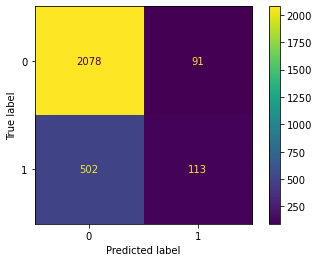

In [24]:
# confusion matrix
cm = metrics.confusion_matrix(y_test, dt_pred, labels = decision_tree.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = decision_tree.classes_)
disp.plot()
plt.show()

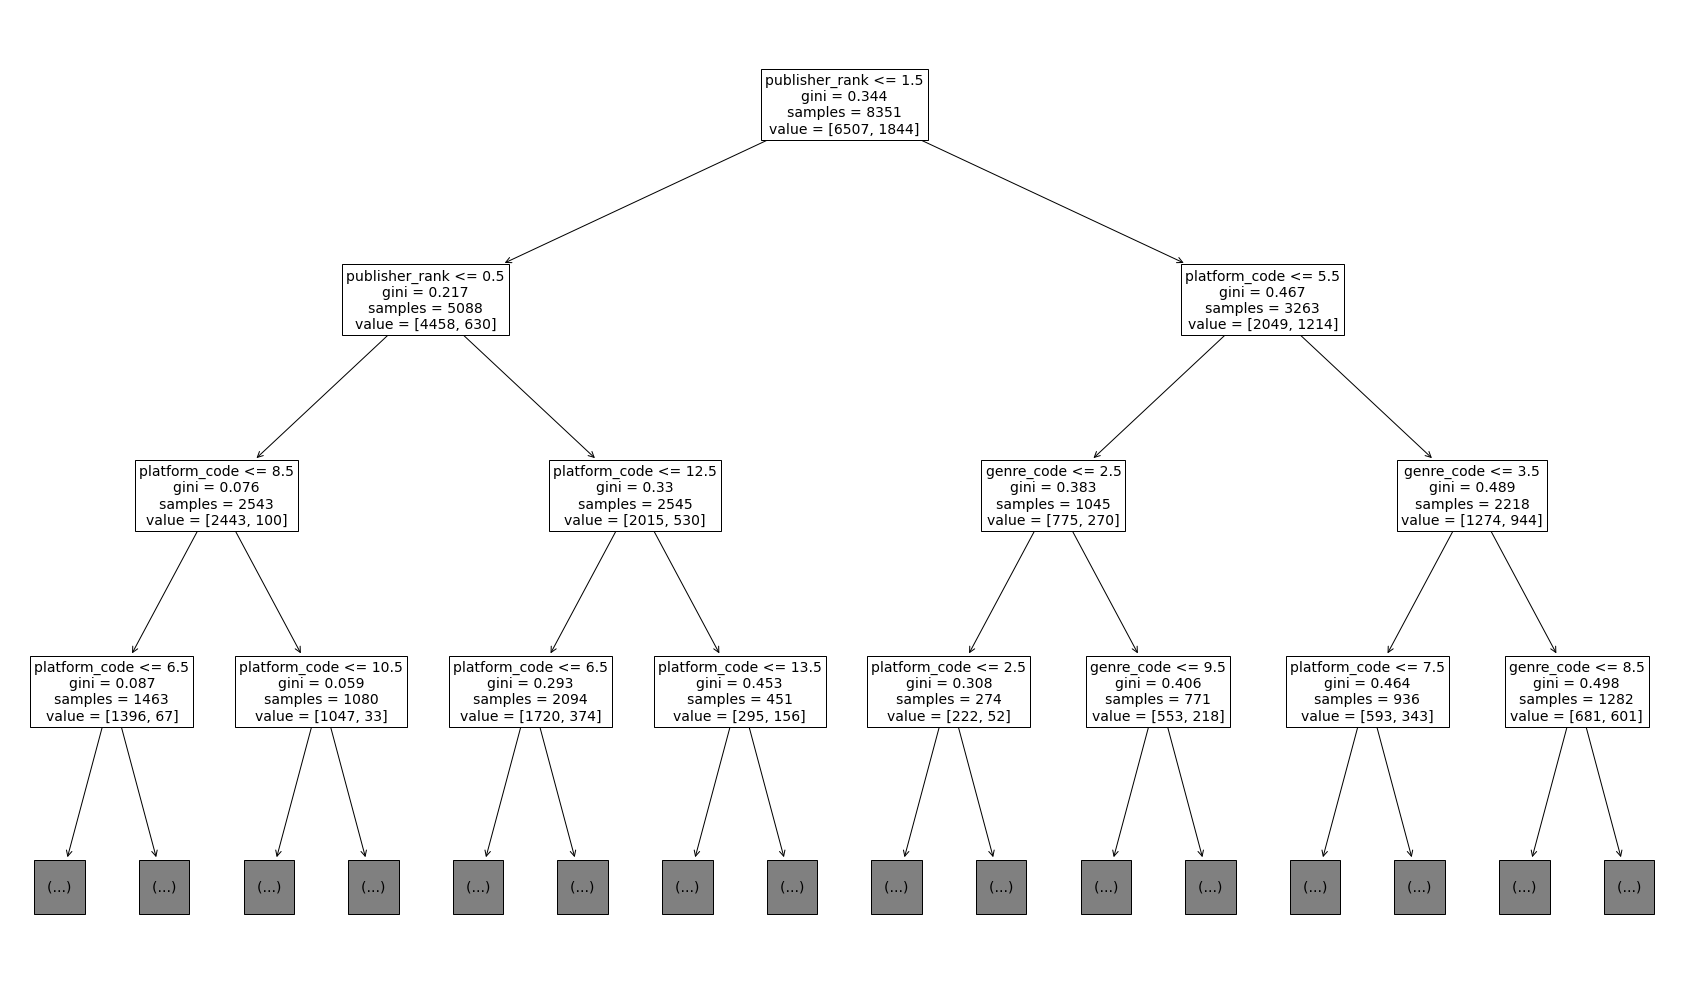

In [25]:
# plotting the tree
plt.figure(figsize=(30,18))
plot_tree(decision_tree, max_depth=3, fontsize=14, feature_names=X.columns)
plt.show()

<AxesSubplot:>

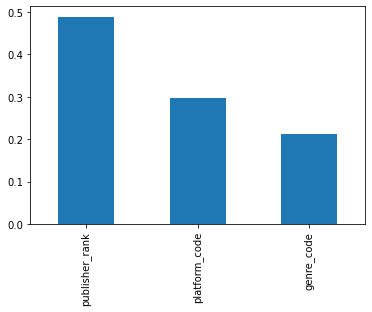

In [26]:
# feature importance
importances = decision_tree.feature_importances_
forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)

In [27]:
# validation
# Assign a dictionary of hyperparameters to search over
tree_para = {'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50],
             'min_samples_leaf': [2, 5, 10, 20, 50]}
# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}
# Instantiate the classifier/ check combinations of values
tuned_decision_tree = DecisionTreeClassifier(random_state = 42)
# Instantiate the GridSearch
clf = GridSearchCV(tuned_decision_tree, tree_para, scoring = scoring, cv=5, refit="f1")

In [28]:
%%capture
# Fit the model
clf.fit(X_train, y_train)
print(clf.best_estimator_)

# Determine the best average validation score
print("Best Avg. Validation Score: ", "%.4f" % clf.best_score_)

# Determine the "best" decision tree model's accuracy, precision, recall, and F1 score
results = pd.DataFrame(columns=['Model', 'F1', 'Recall', 'Precision', 'Accuracy'])

In [29]:
def make_results(model_name, model_object):
    """
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.
    """

    # Get all the results from the CV and put them in a df.
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score).
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax( ), :]

    # Extract accuracy, precision, recall, and f1 score from that row.
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'Model': [model_name],
                          'F1': [f1],
                          'Recall': [recall],
                          'Precision': [precision],
                          'Accuracy': [accuracy]
                          }
                         )

    return table

In [30]:
# Call the function on our model
result_table = make_results("Tuned Decision Tree", clf)

result_table

,Model,F1,Recall,Precision,Accuracy
0,Tuned Decision Tree,0.270205,0.18494,0.511038,0.780385


[Text(0.5, 0.9, 'publisher_rank <= 1.5\ngini = 0.344\nsamples = 8351\nvalue = [6507, 1844]'),
 Text(0.25, 0.7, 'publisher_rank <= 0.5\ngini = 0.217\nsamples = 5088\nvalue = [4458, 630]'),
 Text(0.125, 0.5, 'platform_code <= 8.5\ngini = 0.076\nsamples = 2543\nvalue = [2443, 100]'),
 Text(0.0625, 0.3, 'platform_code <= 6.5\ngini = 0.087\nsamples = 1463\nvalue = [1396, 67]'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'platform_code <= 10.5\ngini = 0.059\nsamples = 1080\nvalue = [1047, 33]'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'platform_code <= 12.5\ngini = 0.33\nsamples = 2545\nvalue = [2015, 530]'),
 Text(0.3125, 0.3, 'platform_code <= 6.5\ngini = 0.293\nsamples = 2094\nvalue = [1720, 374]'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'platform_code <= 13.5\ngini = 0.453\nsamples = 451\nvalue = [295, 156]'),
 Text(0.40625, 0.1

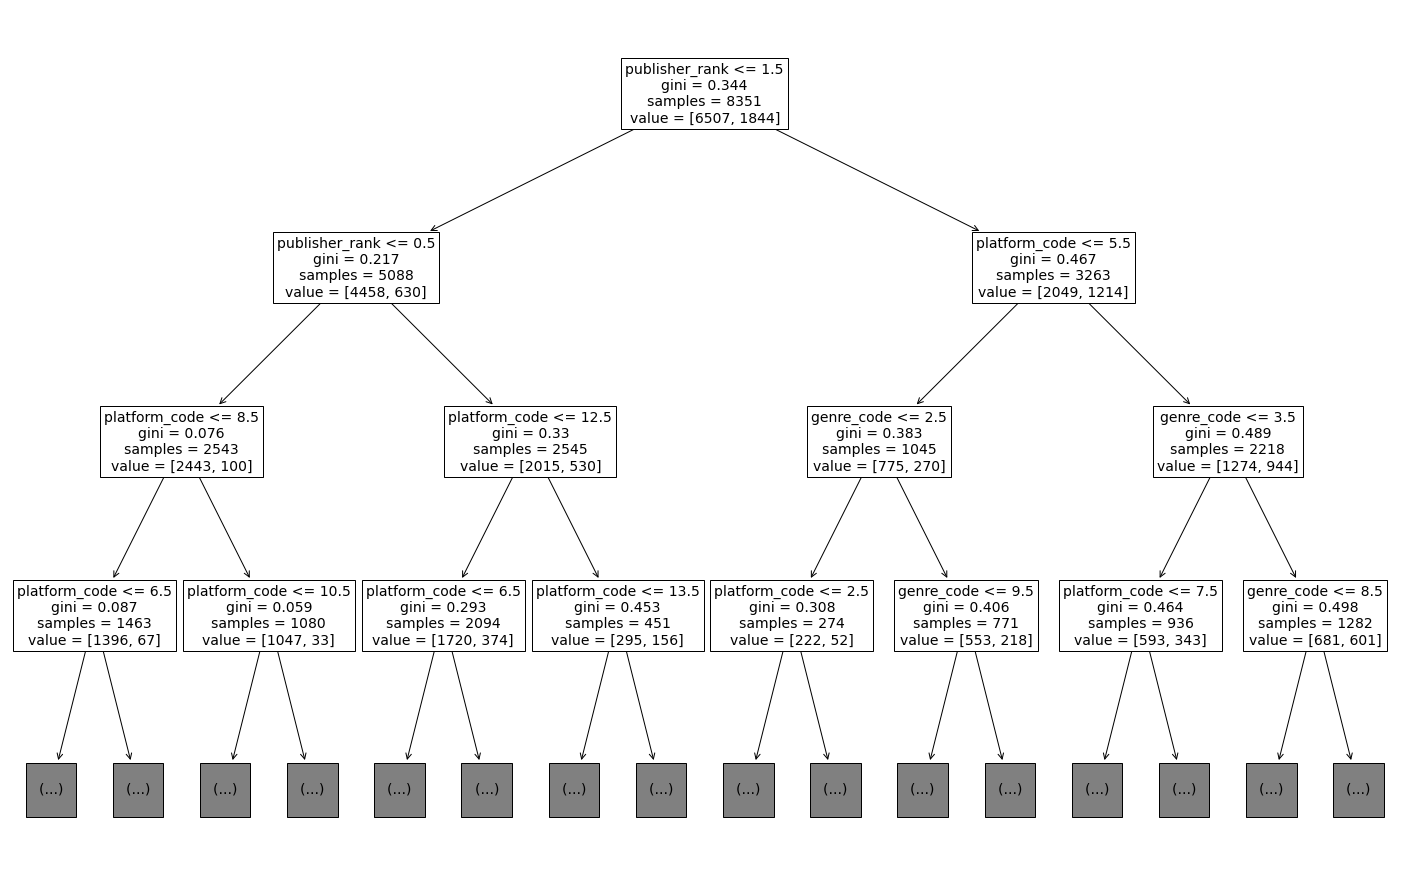

In [31]:
# plot the best decision tree
plt.figure(figsize=(25,16))
plot_tree(clf.best_estimator_, max_depth=3, fontsize=14, feature_names=X.columns)